# Linear Regression and Error Curve

Juan Abraham Zumaya Galvan 135611

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
Location = r'C:\Users\hp\Desktop\learning_machine\clases\RegLin.csv' # Se obtiene la locazion del documento

In [6]:
df = pd.read_csv(Location)# Se leen los datos

In [7]:
df.describe()

,X,Y
count,1029.000000,1029.000000
mean,50.008111,32.893917
std,29.055066,18.083566
min,0.030369,-4.586608
25%,25.201087,17.583093
50%,50.884987,33.564129
75%,75.636823,48.339811
max,99.959580,71.762748


In [10]:
X = df[df.columns[0:-1]]
Y = df[df.columns[-1]]

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.75) 

In [12]:
X_train.describe()

,X
count,771.000000
mean,49.608757
std,28.332292
min,0.030369
25%,25.467128
50%,50.647232
75%,74.645502
max,99.365013


In [25]:
plt.scatter(X_test, Y_test,  color='black')

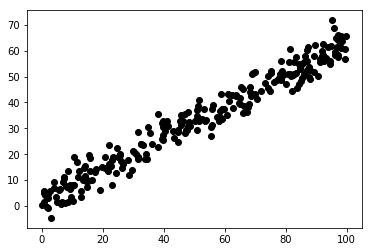

In [26]:
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
Y_prediccion = reg.predict(X_test)

In [33]:
plt.scatter(X_test, Y_test,  color='green')
plt.plot(X_test, Y_prediccion, color='red', linewidth=1)
plt.title('X Vs Y (Test Set)')

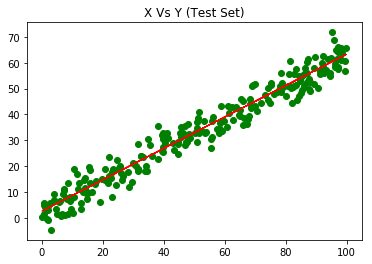

In [34]:
plt.show()

In [37]:
plt.scatter(X_train, Y_train,  color='green')
plt.plot(X_train, reg.predict(X_train), color='red', linewidth=1)
plt.title('X Vs Y (Training Set)')

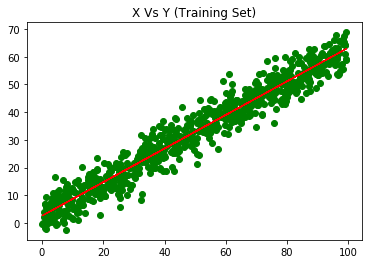

In [38]:
plt.show()

In [41]:
print(np.mean(reg.predict(X_test) - Y_test) **2)## Error cuadratico de la prueba

print(reg.intercept_)
print(reg.coef_)

0.0726792694175
2.62919409394
[ 0.60654796]


In [97]:
w = np.linspace(-reg.intercept_*2, reg.intercept_ * 4, num=200)

In [98]:
print(w)

[ -5.25838819  -5.179116    -5.09984382  -5.02057164  -4.94129945
  -4.86202727  -4.78275509  -4.7034829   -4.62421072  -4.54493853
  -4.46566635  -4.38639417  -4.30712198  -4.2278498   -4.14857762
  -4.06930543  -3.99003325  -3.91076106  -3.83148888  -3.7522167
  -3.67294451  -3.59367233  -3.51440015  -3.43512796  -3.35585578
  -3.27658359  -3.19731141  -3.11803923  -3.03876704  -2.95949486
  -2.88022268  -2.80095049  -2.72167831  -2.64240612  -2.56313394
  -2.48386176  -2.40458957  -2.32531739  -2.24604521  -2.16677302
  -2.08750084  -2.00822865  -1.92895647  -1.84968429  -1.7704121
  -1.69113992  -1.61186774  -1.53259555  -1.45332337  -1.37405118
  -1.294779    -1.21550682  -1.13623463  -1.05696245  -0.97769027
  -0.89841808  -0.8191459   -0.73987371  -0.66060153  -0.58132935
  -0.50205716  -0.42278498  -0.3435128   -0.26424061  -0.18496843
  -0.10569624  -0.02642406   0.05284812   0.13212031   0.21139249
   0.29066467   0.36993686   0.44920904   0.52848122   0.60775341
   0.6870255

In [99]:
m = reg.coef_[0]
b = reg.intercept_
indices = X.index.values
print(indices)
tam=len (indices)

[   0    1    2 ..., 1026 1027 1028]


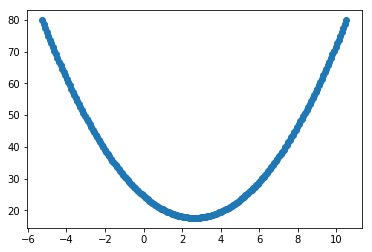

In [107]:
def Error(b, m, X,Y):
    indices = Y.index.values
    E = 0
    for i in range(0, len(indices)):
        index = indices[i]
        x = X['X'][index]
        y = Y[index]
        E += (y - (m * x + b)) ** 2
    return E / float(len(X))

df = pd.DataFrame()

for i in range(0, len(w)):
    x = Error(w[i], m, X_train, Y_train)
    df = df.append({'int': w[i], 'error': x}, ignore_index=True)
    


plt.scatter(df['int'], df['error'])
plt.show()